Получите базовое решение:

Удалите все пропущенные значения

Удалите все категориальные переменные

Обучите модель

Выберете и посчитайте метрику качества

Проведите первичный анализ данных

Проведите визуальный анализ данных

Разбейте данные на обучение и тест

Сделайте предобработку данных с помощью класса и пайплайна

Обучите модель классификации с целевым признаком Loan_Status

Оцените подходящие метрики качества

Сформулируйте выводы по проделанной работе

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, PrecisionRecallDisplay, classification_report, roc_curve, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://drive.google.com/uc?id=10p9gQwRQXle5GHeyJyKUQ3otcaJNDZYF -O Credit

--2024-06-14 16:52:58--  https://drive.google.com/uc?id=10p9gQwRQXle5GHeyJyKUQ3otcaJNDZYF
Resolving drive.google.com (drive.google.com)... 74.125.126.139, 74.125.126.113, 74.125.126.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.126.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=10p9gQwRQXle5GHeyJyKUQ3otcaJNDZYF [following]
--2024-06-14 16:52:58--  https://drive.usercontent.google.com/download?id=10p9gQwRQXle5GHeyJyKUQ3otcaJNDZYF
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.183.132, 2607:f8b0:4001:c64::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.183.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38011 (37K) [application/octet-stream]
Saving to: ‘Credit’

Credit              100%[===================>]  37.12K  --.-KB/s    in 0.001s  

2024-06-14 16:52:59 (72.0 MB/s) - ‘Credi

In [ ]:
data = pd.read_csv('Credit')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y




---
1


---




In [ ]:
data_clean = data.dropna()
data_clean['Loan_Status'] = data_clean['Loan_Status'].replace({'Y': 1, 'N': 0})


In [ ]:
for column in data_clean:
  if data_clean[column].dtype == object:
    data_clean.drop(column, axis=1, inplace=True)
data_clean

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1
5,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1
610,4106,0.0,40.0,180.0,1.0,1
611,8072,240.0,253.0,360.0,1.0,1
612,7583,0.0,187.0,360.0,1.0,1


In [ ]:
x1 = data_clean.drop('Loan_Status', axis=1)
y1 = data_clean['Loan_Status']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

model_lr1 = LogisticRegression()
model_lr1.fit(x1_train, y1_train)

LogisticRegression()

In [ ]:

print(classification_report(model_lr1.predict(x1_test), y1_test))

              precision    recall  f1-score   support

           0       0.34      1.00      0.51        15
           1       1.00      0.78      0.87       129

    accuracy                           0.80       144
   macro avg       0.67      0.89      0.69       144
weighted avg       0.93      0.80      0.84       144



1. Результаты на метриках могут быть слишком оптимистичными из-за недостаточного объема данных.
2. Возможно, что модель переобучилась на имеющихся данных из-за слишком простой структуры или недостаточного разнообразия признаков.



---


Теперь построим более сложную модель.

1. Сделаем первичный анализ

In [ ]:
y = data['Loan_ID']
data.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
cat_cols = data.select_dtypes(include = object)
for column in cat_cols:
  print(cat_cols[column].value_counts())
  print('--------------')

Gender
Male      489
Female    112
Name: count, dtype: int64
--------------
Married
Yes    398
No     213
Name: count, dtype: int64
--------------
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
--------------
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
--------------
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
--------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
--------------
Loan_Status
Y    422
N    192
Name: count, dtype: int64
--------------


In [ ]:
data['Dependents'] = data['Dependents'].replace({'3+': 3})
data['Dependents'] = data['Dependents'].astype(float)

In [ ]:
num_cols = data.select_dtypes(include = [int, float])
num_cols

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0
610,3.0,4106,0.0,40.0,180.0,1.0
611,1.0,8072,240.0,253.0,360.0,1.0
612,2.0,7583,0.0,187.0,360.0,1.0


Анализ показал, что мы имеем:

1. 6 вещественных колонок и 6 категориальных.

2. У нас есть колонки с пропусками

3. У нас есть аномалии

4. В категориальных колонках мало классов

5. Классы в таргете несбалансированны

**EDA**

**Вещественные признаки**

<Axes: >

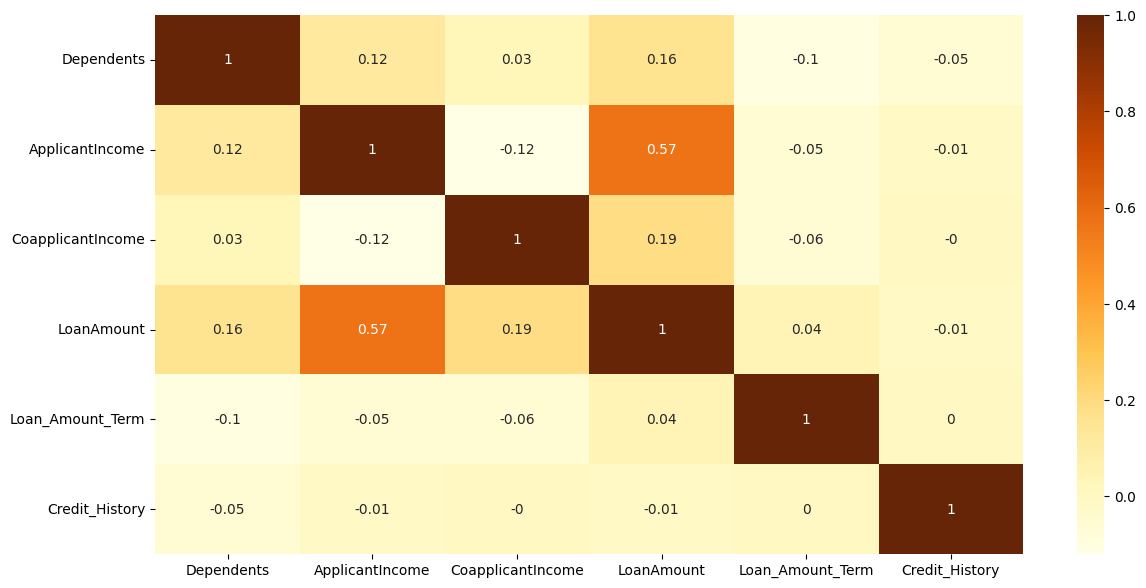

In [ ]:
correlation = num_cols.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

Простой корелляции между признаками не наблюдаем

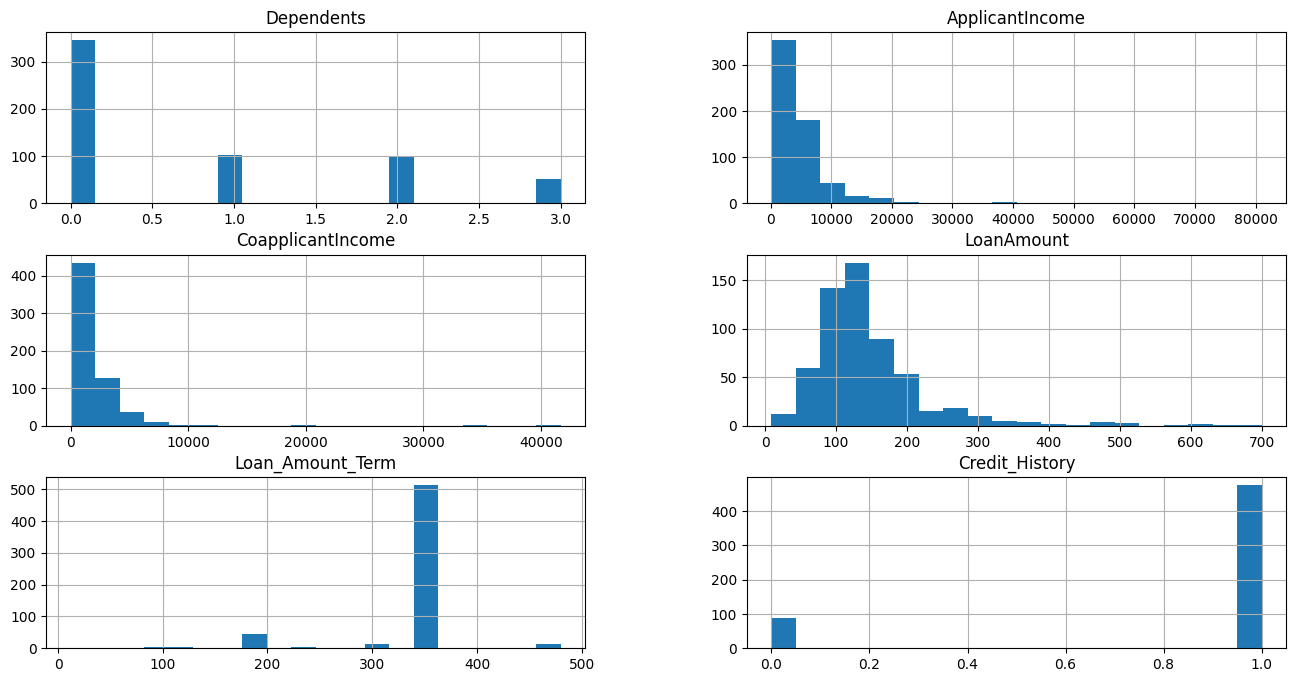

In [ ]:
data.hist(figsize=(16, 8), bins=20);

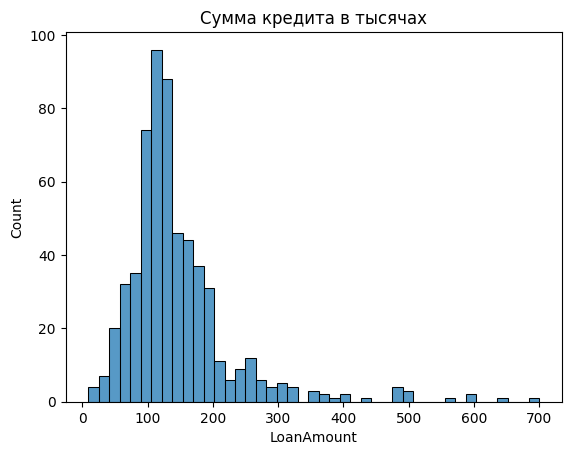

In [ ]:
sns.histplot(data['LoanAmount']);
plt.title('Сумма кредита в тысячах');

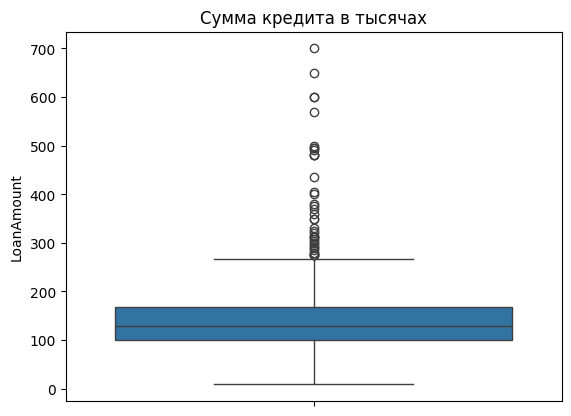

In [ ]:
sns.boxplot(data['LoanAmount'])
plt.title('Сумма кредита в тысячах');

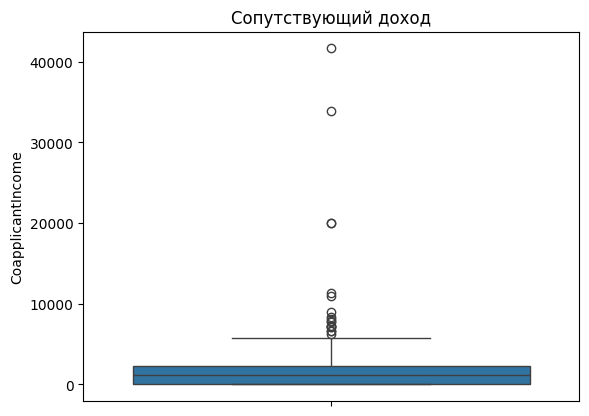

In [ ]:
sns.boxplot(data['CoapplicantIncome'])
plt.title('Сопутствующий доход');

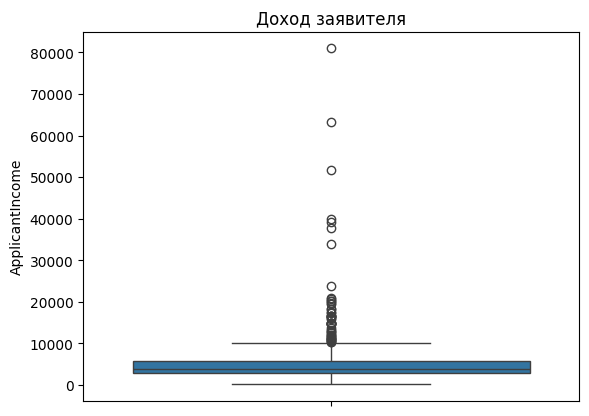

In [ ]:
sns.boxplot(data['ApplicantIncome'])
plt.title('Доход заявителя');

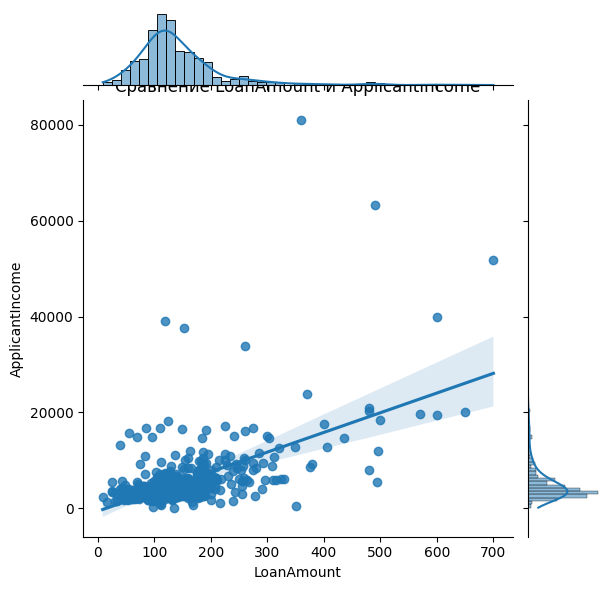

In [ ]:
sns.jointplot(x = data['LoanAmount'], y = data['ApplicantIncome'], kind='reg')

plt.title('Сравнение LoanAmount и ApplicantIncome')

plt.show()

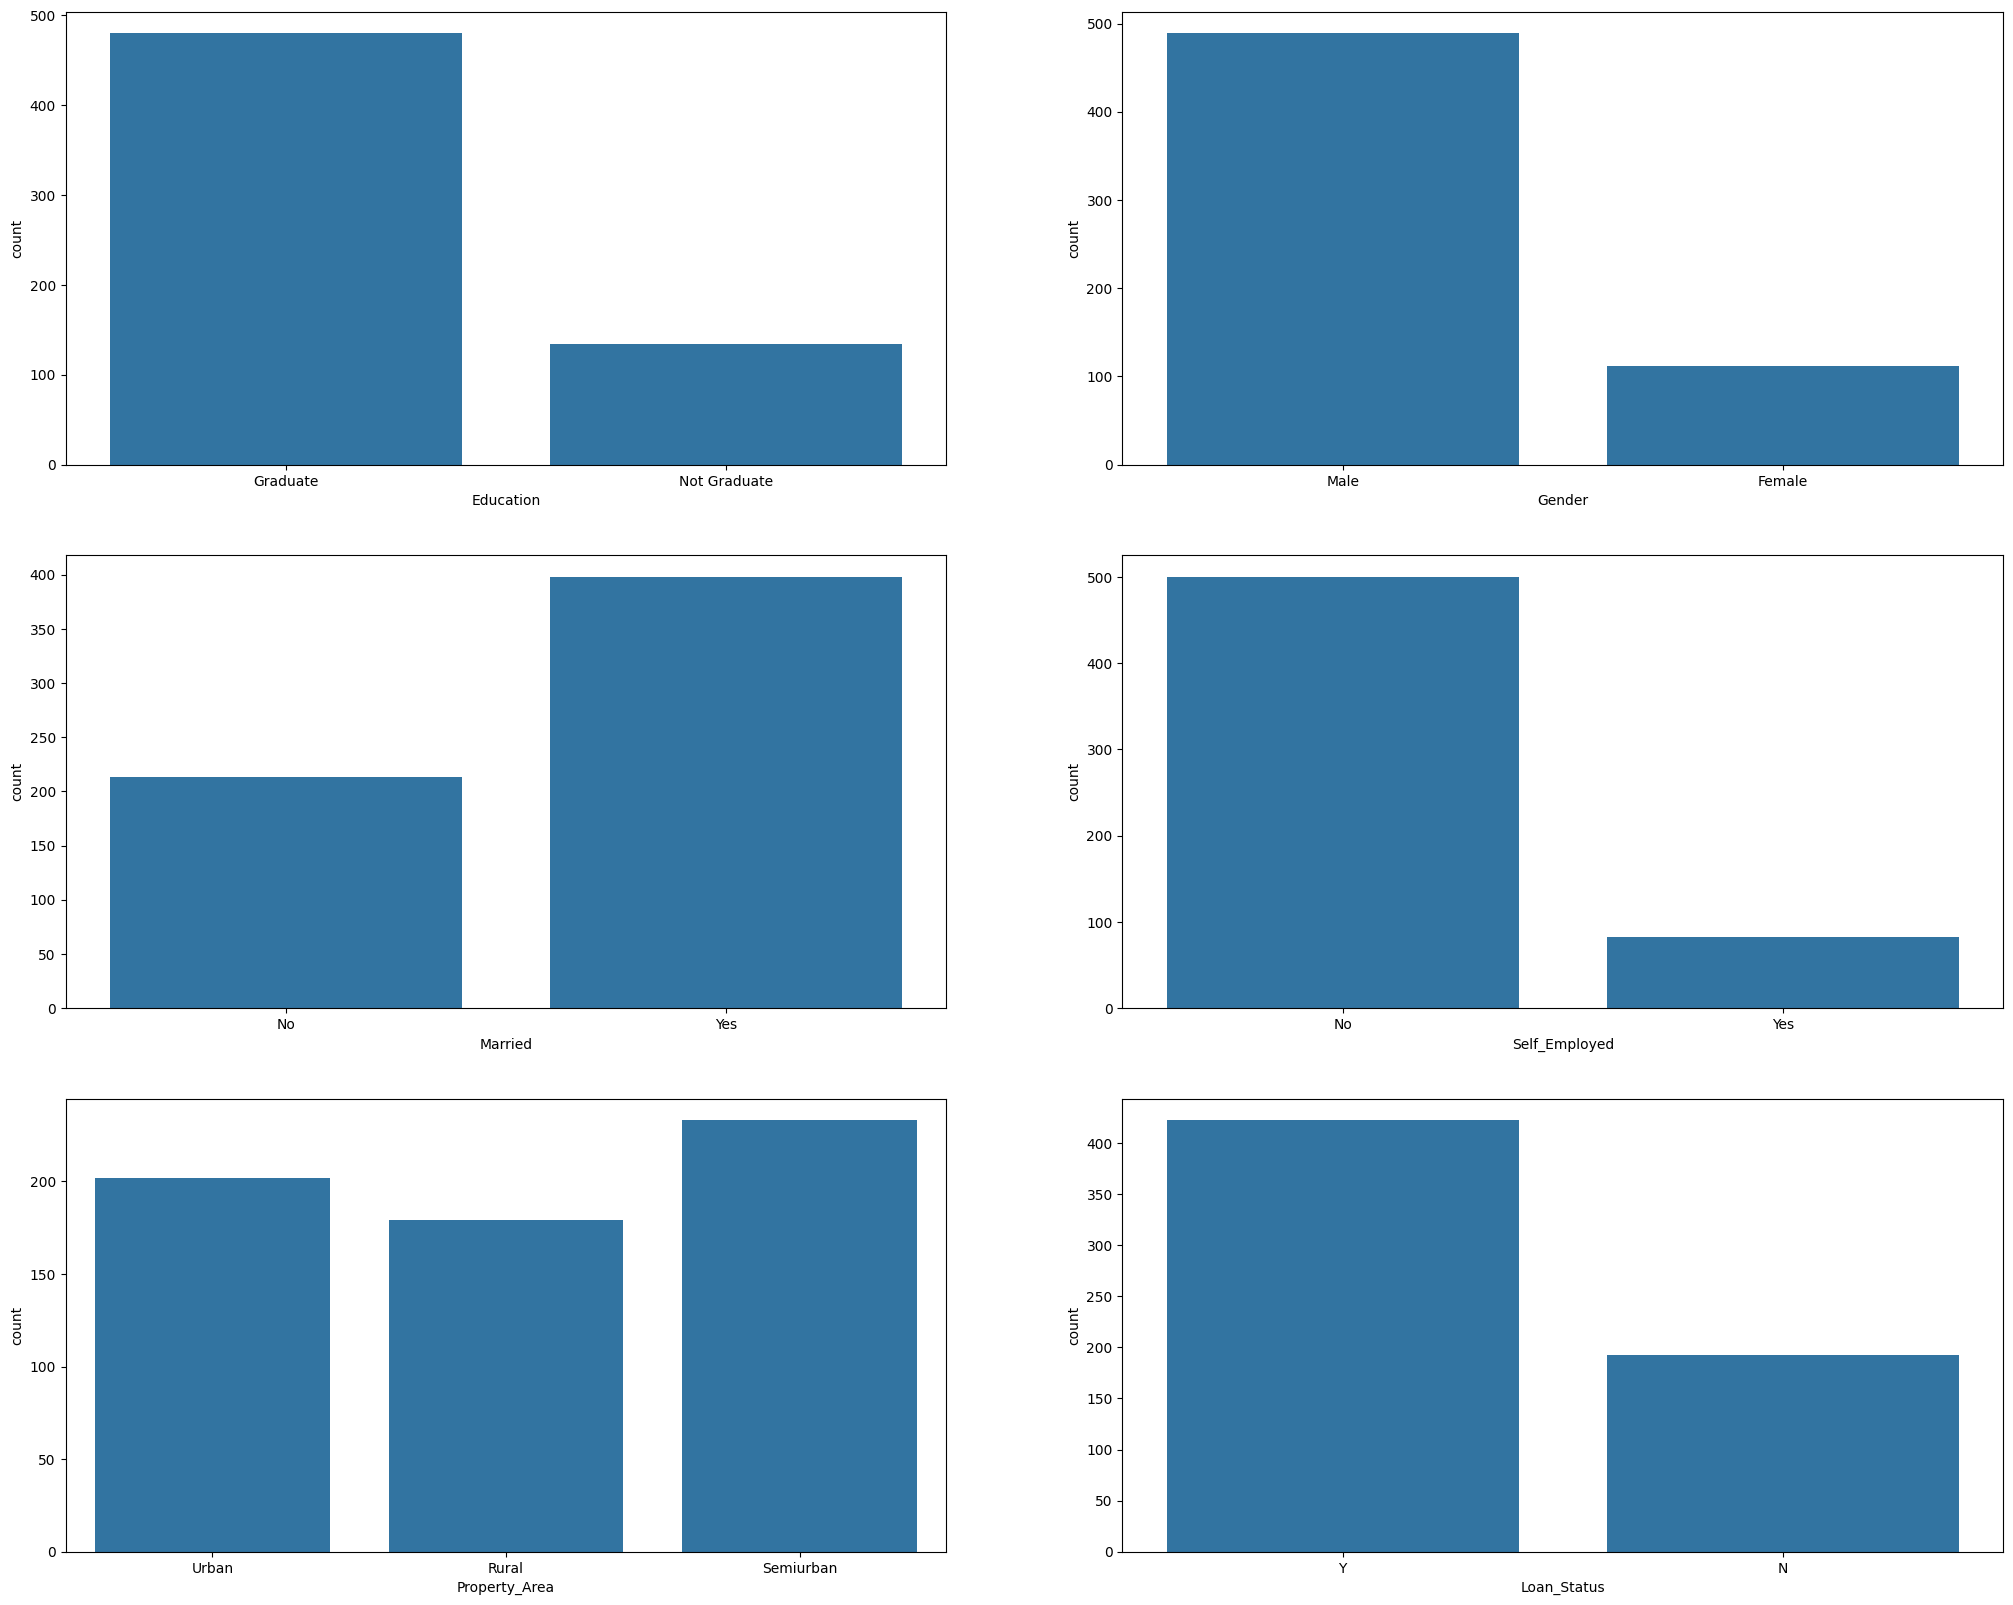

In [ ]:
plt.figure(figsize = (25,20))

plt.subplot(3, 2, 1)
sns.countplot(x=data['Education'])

plt.subplot(3, 2, 2)
sns.countplot(x=data['Gender'])

plt.subplot(3, 2, 3)
sns.countplot(x=data['Married'])

plt.subplot(3, 2, 4)
sns.countplot(x=data['Self_Employed'])

plt.subplot(3, 2, 5)
sns.countplot(x=data['Property_Area'])

plt.subplot(3, 2, 6)
sns.countplot(x=data['Loan_Status']);



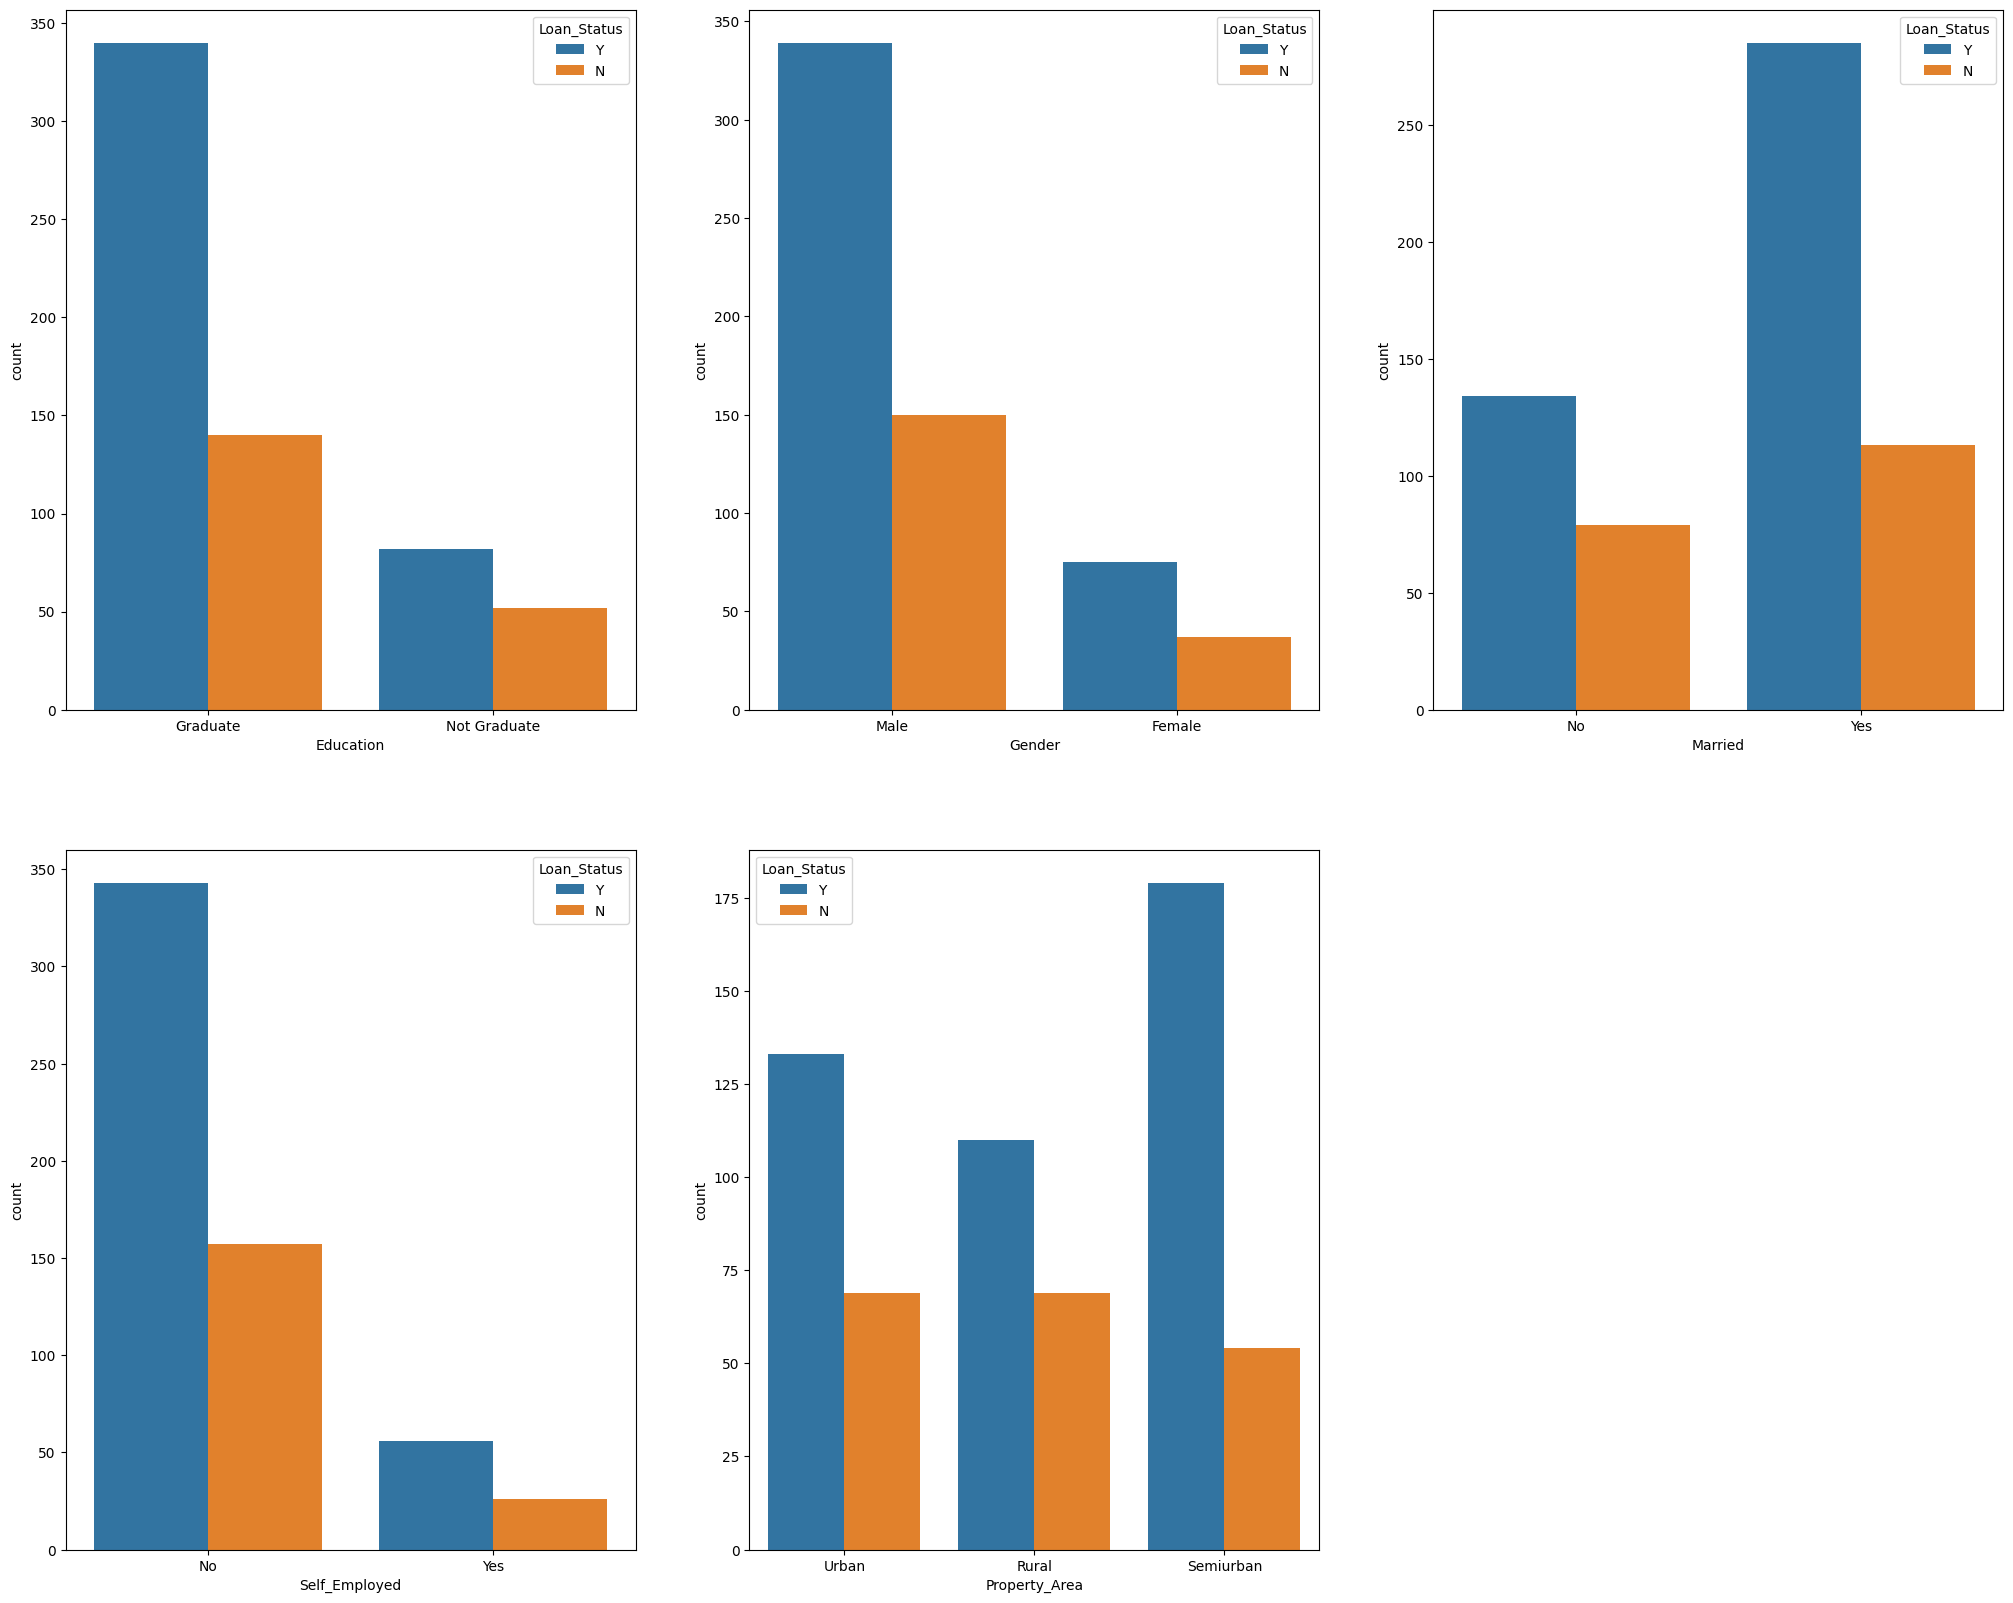

In [ ]:
plt.figure(figsize = (25,20))

plt.subplot(2, 3, 1)
sns.countplot(x=data['Education'],  hue = data['Loan_Status'])

plt.subplot(2, 3, 2)
sns.countplot(x=data['Gender'],  hue = data['Loan_Status'])

plt.subplot(2, 3, 3)
sns.countplot(x=data['Married'],  hue = data['Loan_Status'])

plt.subplot(2, 3, 4)
sns.countplot(x=data['Self_Employed'],  hue = data['Loan_Status'])

plt.subplot(2, 3, 5)
sns.countplot(x=data['Property_Area'],  hue = data['Loan_Status']);



Признаки особо не влияют на наш таргет

Много аномалий

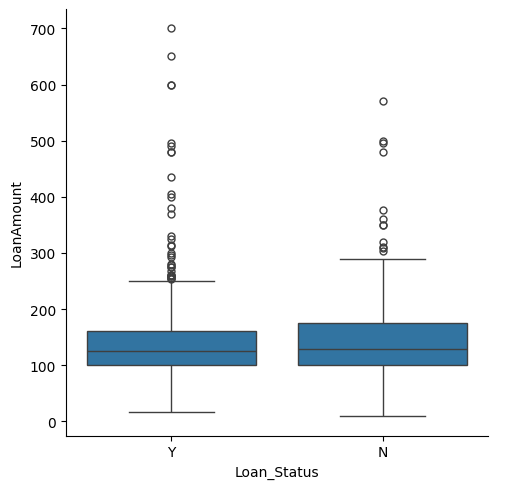

In [ ]:
sns.catplot(x = 'Loan_Status', y="LoanAmount", kind="box", data = data);

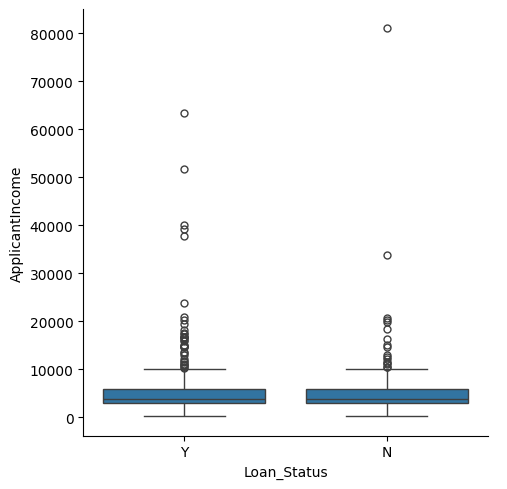

In [ ]:
sns.catplot(x = 'Loan_Status', y="ApplicantIncome", kind="box", data = data);

****
Разбейте данные на обучение и тест

In [ ]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
y = y.replace({'Y': 1, 'N': 0})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

****
Сделайте предобработку данных с помощью класса и пайплайна



*   Аномалии будем сводить до квантиля 85
*   К категориальным признакам примеим OHE

*   К пропускам применим моду класса



In [ ]:
class DataPipeline(BaseEstimator, TransformerMixin):

    def __init__(self):

        self.Loan_Amount_max = None
        self.CoapplicantIncome_max = None
        self.ApplicantIncome_max = None





    def fit(self, data, y=None):

        self.Loan_Amount_max = data['LoanAmount'].quantile(0.85)
        self.ApplicantIncome_max = data['ApplicantIncome'].quantile(0.85)
        self.CoapplicantIncome_max = data['CoapplicantIncome'].quantile(0.85)

        return self

    def transform(self, data, y=None):

        data.loc[data['LoanAmount'] > self.Loan_Amount_max, 'LoanAmount'] = self.Loan_Amount_max

        data.loc[data['ApplicantIncome'] > self.ApplicantIncome_max, 'ApplicantIncome'] = self.ApplicantIncome_max

        data.loc[data['CoapplicantIncome'] > self.CoapplicantIncome_max, 'CoapplicantIncome'] = self.CoapplicantIncome_max

        for col in cat_cols:
          if col in X.columns:
            one_hot = pd.get_dummies(data[col], prefix=col, drop_first=True)
            data = (pd.concat((data.drop(col, axis=1), one_hot), axis=1))

          data.replace({False: 0, True: 1}, inplace=True)

        data.fillna(data.mode().iloc[0], inplace=True)




        return data

****
Обучите модель классификации с целевым признаком Loan_Status


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipe = make_pipeline(
    DataPipeline()
)

X_train_clean = pipe.fit_transform(X_train)

In [ ]:
X_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,449.000000,460.000000,460.000000,444.000000,449.000000,424.000000
mean,0.743875,4440.501072,1197.163323,130.611023,339.100223,0.844340
std,1.015005,2014.613660,1220.988315,43.023830,68.560787,0.362961
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,0.000000,2892.750000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3862.000000,1084.500000,128.000000,360.000000,1.000000
75%,1.000000,5834.000000,2330.750000,165.250000,360.000000,1.000000
max,3.000000,7933.050625,3053.280125,192.332750,480.000000,1.000000


In [ ]:
X_train_clean.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,4440.501072,1197.163323,132.757866,339.600000,0.856522,0.784783,0.628261,0.163043,0.154348,0.084783,0.221739,0.132609,0.384783,0.330435
std,2014.613660,1220.988315,43.757307,67.809653,0.350942,0.411421,0.483795,0.369808,0.361675,0.278861,0.415869,0.339521,0.487074,0.470882
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2892.750000,0.000000,102.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3862.000000,1084.500000,130.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5834.000000,2330.750000,175.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,7933.050625,3053.280125,192.332750,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


****
Logistic Regression

Test
              precision    recall  f1-score   support

           0      0.481     0.565     0.520        46
           1      0.800     0.741     0.769       108

    accuracy                          0.688       154
   macro avg      0.641     0.653     0.645       154
weighted avg      0.705     0.688     0.695       154



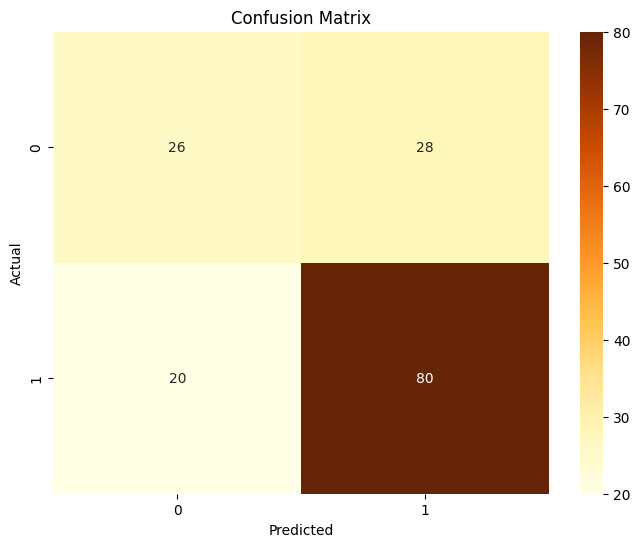

In [ ]:
model_ls = LogisticRegression(class_weight='balanced')
model_ls.fit(X_train, y_train)
y_pred_test = model_ls.predict(X_test)
y_pred_train= model_ls.predict(X_train)

print('Test')
print(classification_report(y_pred_test, y_test, digits=3))

predictions = model_ls.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC-AUC: 0.706
PR-AUC: 0.783


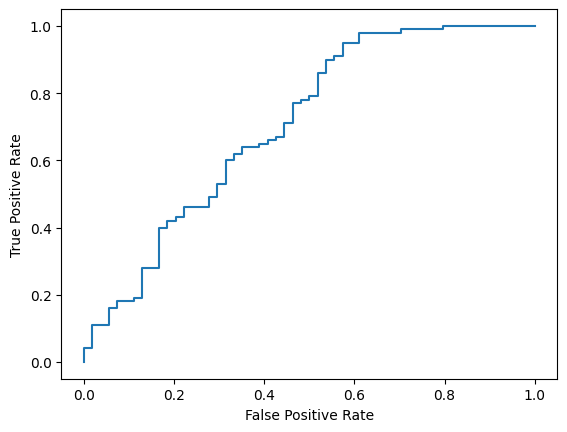

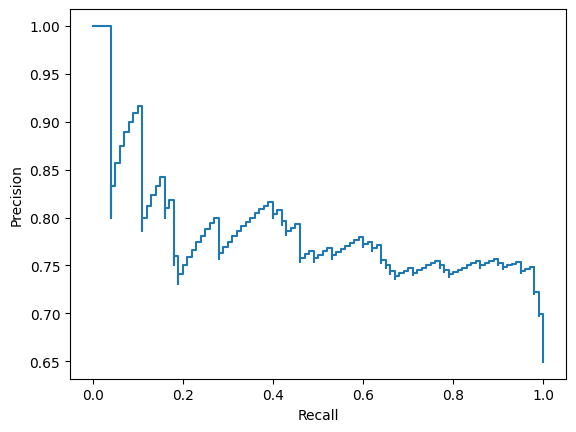

In [ ]:



fpr, tpr, thresholds = roc_curve(y_test, model_ls.predict_proba(X_test)[:, 1])



RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('ROC-AUC:', round(auc(fpr, tpr), 3))

precision, recall, thresholds = precision_recall_curve(y_test, model_ls.predict_proba(X_test)[:, 1])

PrecisionRecallDisplay(precision=precision, recall=recall).plot()

print('PR-AUC:', round(auc(recall, precision), 3))



---


GridSearchCV

Test
              precision    recall  f1-score   support

           0      0.426     0.767     0.548        30
           1      0.930     0.750     0.830       124

    accuracy                          0.753       154
   macro avg      0.678     0.758     0.689       154
weighted avg      0.832     0.753     0.775       154

Best Params: {'C': 0.0001, 'penalty': 'l2'}


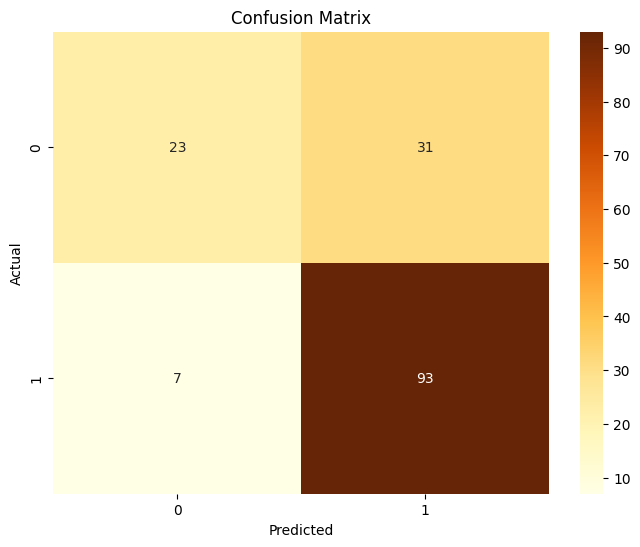

In [ ]:

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [1e-5, 0.0001, 0.001, 0.01]}

grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)

print('Test')
print(classification_report(grid.predict(X_test), y_test, digits=3))

print('Best Params:', grid.best_params_)


predictions = grid.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



ROC-AUC: 0.727
PR-AUC: 0.807


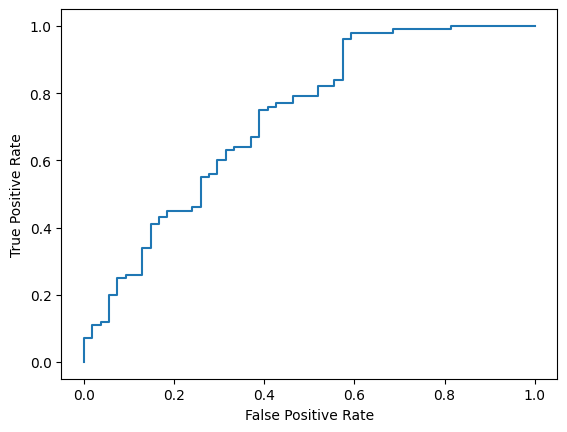

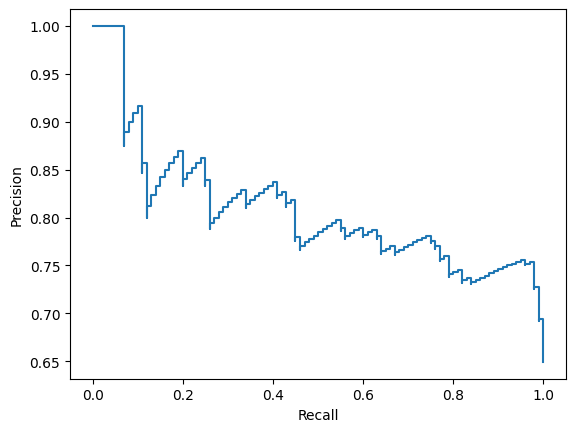

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:, 1])

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('ROC-AUC:', round(auc(fpr, tpr), 3))

precision, recall, thresholds = precision_recall_curve(y_test, grid.predict_proba(X_test)[:, 1])

PrecisionRecallDisplay(precision=precision, recall=recall).plot()

print('PR-AUC:', round(auc(recall, precision), 3))

****
SVM

Test
              precision    recall  f1-score   support

           0      0.481     0.591     0.531        44
           1      0.820     0.745     0.781       110

    accuracy                          0.701       154
   macro avg      0.651     0.668     0.656       154
weighted avg      0.723     0.701     0.709       154



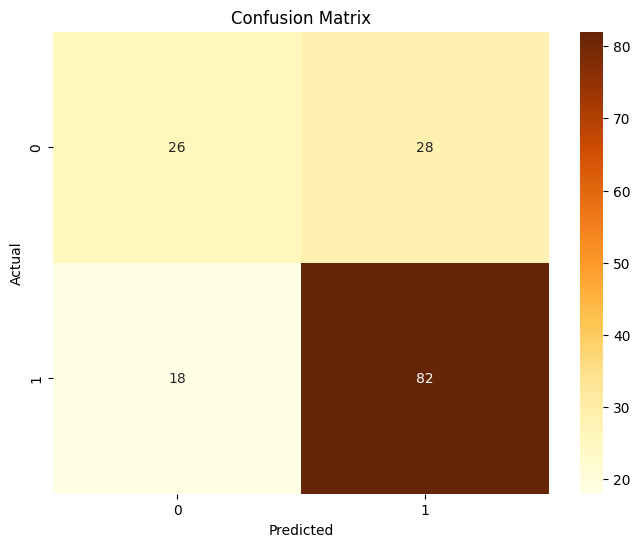

In [ ]:

pipe_svm =  LinearSVC(class_weight='balanced')

pipe_svm.fit(X_train, y_train)

print('Test')
print(classification_report(pipe_svm.predict(X_test), y_test, digits=3))


predictions = pipe_svm.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Преобразуем выходы pipe_svm.decision_function для изображение ROC-AUC

ROC-AUC: 0.709
PR-AUC: 0.807


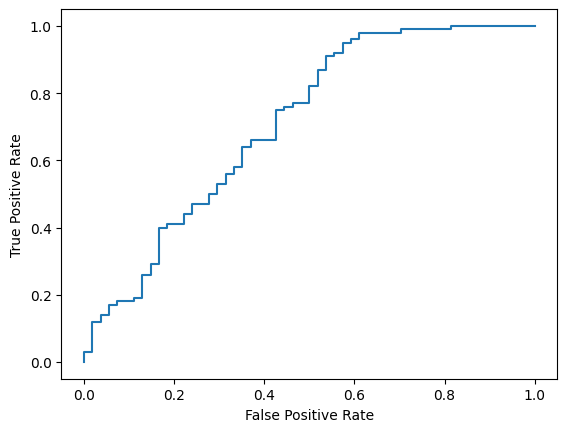

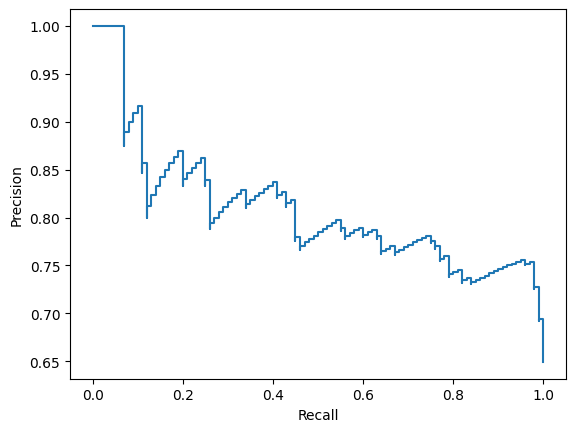

In [ ]:
def perevod_svm(decision_function):
    probs = []
    min_decision = min(decision_function)
    max_decision = max(decision_function)
    for value in decision_function:
        if value < 0:
            prob = (abs(value-min_decision)/abs(min_decision))*0.5
        elif value > 0:
            prob = (abs(value)/abs(max_decision))*0.5+0.5
        else:
            prob = 0.5
        probs.append(prob)
    return probs

svm_proba = perevod_svm(pipe_svm.decision_function(X_test))

fpr, tpr, thresholds = roc_curve(y_test, svm_proba)


RocCurveDisplay(fpr=fpr, tpr=tpr).plot();

print('ROC-AUC:', round(auc(fpr, tpr), 3))

precision, recall, thresholds = precision_recall_curve(y_test, grid.predict_proba(X_test)[:, 1])

PrecisionRecallDisplay(precision=precision, recall=recall).plot()

print('PR-AUC:', round(auc(recall, precision), 3))


****
Выводы по проделанной работе

По началу модель делала предсказания по большей части к классу 'Y', поэтому precision был минимальный, а recall максимальный. (пример будет ниже)

После этого я применил балансировку классов в парамметрах всех моделей, чтобы выровнять все метрики. Я упал в качестве accuracy, на некоторых моделях немного упал в f-1 мере, но теперь точность и полнота у меня примерно одинаковые, под 0.5

Так как мы не знаем, какую именно бизнес-задачу преследует данный заказчик, то считаю самым оптимальным оставить именно такую золотую середину.

Оценивал модель как с помощью матрицы ошибок, так и с помощью ROC-AUC, PR-AUC. Так как в этой задаче классы несбалансированы - отдавал предпочтение PR-AUC, так как он более оптимистично относится к такому.
****




Test
              precision    recall  f1-score   support

           0      0.389     0.913     0.545        23
           1      0.980     0.748     0.848       131

    accuracy                          0.773       154
   macro avg      0.684     0.831     0.697       154
weighted avg      0.892     0.773     0.803       154



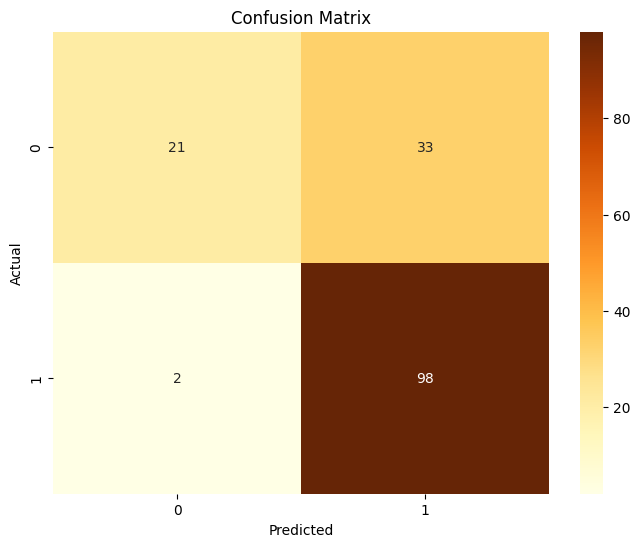

In [ ]:
model_ls = LogisticRegression()
model_ls.fit(X_train, y_train)
y_pred_test = model_ls.predict(X_test)
y_pred_train= model_ls.predict(X_train)

print('Test')
print(classification_report(y_pred_test, y_test, digits=3))

predictions = model_ls.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
mat = np.array([[1, 1, 1],
                [1, 2, 3],
                [1, 3, 6]])

print(mat)

[[1 1 1]
 [1 2 3]
 [1 3 6]]


In [ ]:
np.linalg.det(mat)

1.0